In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
florida = pd.read_csv('florida_file (1).csv')
florida["Date"] = pd.to_datetime(florida["Date"])

In [4]:
florida.head(5)

,Date,Avg_Temp,confidence_interval_temp,State,Country,Year,Month,Day
0,1743-11-01,17.694,2.514,Florida,United States,1743,11,1
1,1743-12-01,22.978,2.470,Florida,United States,1743,12,1
2,1744-01-01,22.978,2.470,Florida,United States,1744,1,1
3,1744-02-01,22.978,2.470,Florida,United States,1744,2,1
4,1744-03-01,22.978,2.470,Florida,United States,1744,3,1


In [5]:
florida = florida[["Date", "Avg_Temp"]]
florida = florida.fillna(florida.bfill())
florida.columns = ['Date', 'Avg_Temp']
florida.head(5)

,Date,Avg_Temp
0,1743-11-01,17.694
1,1743-12-01,22.978
2,1744-01-01,22.978
3,1744-02-01,22.978
4,1744-03-01,22.978


In [6]:
florida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3239 non-null   datetime64[ns]
 1   Avg_Temp  3239 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.7 KB


In [7]:
train = florida[:-225]
print(len(train))

3014


In [8]:
train.tail()

,Date,Avg_Temp
3009,1994-08-01,27.040
3010,1994-09-01,26.031
3011,1994-10-01,23.479
3012,1994-11-01,21.581
3013,1994-12-01,17.296


In [9]:
test = florida[-225:]
print(len(test))
test.head()

225


,Date,Avg_Temp
3014,1995-01-01,14.450
3015,1995-02-01,15.590
3016,1995-03-01,19.629
3017,1995-04-01,21.649
3018,1995-05-01,25.963


In [10]:
train_dates = pd.to_datetime(train['Date'])
test_dates  = pd.to_datetime(test['Date'])

In [11]:
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Avg_Temp'].values.reshape(-1,1))

In [12]:
train['Avg_Temp'].values.reshape(-1,1).shape

(3014, 1)

In [13]:
train['Avg_Temp'].shape

(3014,)

In [14]:
train['Avg_Temp'].values.reshape(-1,1).shape

(3014, 1)

In [15]:
scaled_data.shape

(3014, 1)

In [16]:
prediction_days = 225

x_train = []
y_train = []

In [29]:
x_train_list = []
y_train_list = []

# Assuming scaled_data is a NumPy array
for x in range(prediction_days, len(scaled_data)):
    x_train_list.append(scaled_data[x - prediction_days:x, 0])
    y_train_list.append(scaled_data[x, 0])

# Convert lists to NumPy arrays
x_train = np.array(x_train_list)
y_train = np.array(y_train_list)

In [30]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(2789, 225)

In [32]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2789, 225, 1)

In [33]:
(x_train.shape[1],1)

(225, 1)

In [34]:
# Build The Model
model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next value

model.compile(optimizer='nadam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 225, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 225, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 225, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 225, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [35]:
history = model.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.1)

Epoch 1/25
79/79 [==============================] - 79s 888ms/step - loss: 0.0631 - val_loss: 0.0451
Epoch 2/25
79/79 [==============================] - 81s 1s/step - loss: 0.0429 - val_loss: 0.0288
Epoch 3/25
79/79 [==============================] - 81s 1s/step - loss: 0.0168 - val_loss: 0.0044
Epoch 4/25
79/79 [==============================] - 88s 1s/step - loss: 0.0094 - val_loss: 0.0056
Epoch 5/25
79/79 [==============================] - 83s 1s/step - loss: 0.0080 - val_loss: 0.0070
Epoch 6/25
79/79 [==============================] - 85s 1s/step - loss: 0.0073 - val_loss: 0.0045
Epoch 7/25
79/79 [==============================] - 85s 1s/step - loss: 0.0070 - val_loss: 0.0037
Epoch 8/25
79/79 [==============================] - 86s 1s/step - loss: 0.0069 - val_loss: 0.0043
Epoch 9/25
79/79 [==============================] - 76s 959ms/step - loss: 0.0066 - val_loss: 0.0057
Epoch 10/25
79/79 [==============================] - 73s 924ms/step - loss: 0.0063 - val_loss: 0.0043
Epoch 11/2

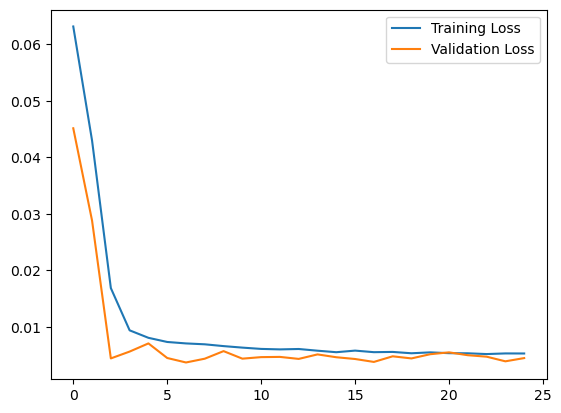

In [36]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [37]:
### Test the Model Accuracy on Existing Data ###
################################################
# take Test data Again
test.head()

,Date,Avg_Temp
3014,1995-01-01,14.450
3015,1995-02-01,15.590
3016,1995-03-01,19.629
3017,1995-04-01,21.649
3018,1995-05-01,25.963


In [38]:
actual_temp = test['Avg_Temp'].values
total_temp = pd.concat((train['Avg_Temp'], test['Avg_Temp']),axis=0)

In [39]:
total_temp

0       17.694
1       22.978
2       22.978
3       22.978
4       22.978
         ...  
3234    23.576
3235    27.432
3236    27.327
3237    28.188
3238    27.493
Name: Avg_Temp, Length: 3239, dtype: float64

In [40]:
print(len(total_temp))
print(len(test))
print(prediction_days)

3239
225
225


In [41]:
model_inputs = total_temp[len(total_temp)-len(test)-prediction_days:].values

In [42]:
model_inputs.shape

(450,)

In [43]:
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [44]:
model_inputs.shape

(450, 1)

In [45]:
model_inputs

array([[0.47551253],
       [0.59330647],
       [0.67903452],
       [0.76248467],
       [0.75140179],
       [0.69800245],
       [0.47945506],
       [0.29012616],
       [0.20001752],
       [0.02330471],
       [0.16589276],
       [0.4550552 ],
       [0.49145786],
       [0.60903277],
       [0.76695286],
       [0.77501314],
       [0.76318556],
       [0.75048186],
       [0.49632031],
       [0.41904678],
       [0.22270895],
       [0.08577186],
       [0.07363764],
       [0.3143508 ],
       [0.49347293],
       [0.64653058],
       [0.74570703],
       [0.76958122],
       [0.77115823],
       [0.74049413],
       [0.56443841],
       [0.49141405],
       [0.33463291],
       [0.14302611],
       [0.1863939 ],
       [0.34422639],
       [0.53298581],
       [0.6092956 ],
       [0.72257754],
       [0.79012616],
       [0.766471  ],
       [0.73041878],
       [0.56308043],
       [0.42658139],
       [0.25744699],
       [0.23335378],
       [0.14635535],
       [0.403

In [46]:
# Make Predictions on Test Data
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [47]:
# Make Predictions on Test Data
x_test_latest = []

for x in [450]:
    x_test_latest.append(model_inputs[x-prediction_days:x, 0])

x_test_latest = np.array(x_test_latest)
x_test_latest = np.reshape(x_test_latest, (x_test_latest.shape[0], x_test_latest.shape[1], 1))

In [48]:
x_test_latest.shape

(1, 225, 1)

In [49]:
x_test[0]

array([[0.47551253],
       [0.59330647],
       [0.67903452],
       [0.76248467],
       [0.75140179],
       [0.69800245],
       [0.47945506],
       [0.29012616],
       [0.20001752],
       [0.02330471],
       [0.16589276],
       [0.4550552 ],
       [0.49145786],
       [0.60903277],
       [0.76695286],
       [0.77501314],
       [0.76318556],
       [0.75048186],
       [0.49632031],
       [0.41904678],
       [0.22270895],
       [0.08577186],
       [0.07363764],
       [0.3143508 ],
       [0.49347293],
       [0.64653058],
       [0.74570703],
       [0.76958122],
       [0.77115823],
       [0.74049413],
       [0.56443841],
       [0.49141405],
       [0.33463291],
       [0.14302611],
       [0.1863939 ],
       [0.34422639],
       [0.53298581],
       [0.6092956 ],
       [0.72257754],
       [0.79012616],
       [0.766471  ],
       [0.73041878],
       [0.56308043],
       [0.42658139],
       [0.25744699],
       [0.23335378],
       [0.14635535],
       [0.403

In [50]:
pred = model.predict(x_test_latest)
pred

1/1 [==============================] - 1s 560ms/step


array([[0.5094286]], dtype=float32)

In [51]:
pred = model.predict(x_test)
pred

8/8 [==============================] - 1s 164ms/step


array([[0.22091088],
       [0.2663805 ],
       [0.36053753],
       [0.4913219 ],
       [0.6198176 ],
       [0.7105421 ],
       [0.7541156 ],
       [0.7480731 ],
       [0.6739068 ],
       [0.51137185],
       [0.33685988],
       [0.23059362],
       [0.222215  ],
       [0.27009302],
       [0.3646084 ],
       [0.49637038],
       [0.6234709 ],
       [0.71254015],
       [0.7557055 ],
       [0.7510698 ],
       [0.6821667 ],
       [0.5255399 ],
       [0.35121602],
       [0.238103  ],
       [0.22005752],
       [0.2635035 ],
       [0.3557145 ],
       [0.48607817],
       [0.615347  ],
       [0.70726395],
       [0.75251913],
       [0.748495  ],
       [0.6773231 ],
       [0.5166935 ],
       [0.34167844],
       [0.23377578],
       [0.22175105],
       [0.26938528],
       [0.36581528],
       [0.49784088],
       [0.6249231 ],
       [0.7134323 ],
       [0.7549869 ],
       [0.7459439 ],
       [0.6642158 ],
       [0.4964772 ],
       [0.32329434],
       [0.226

In [52]:
pred = scaler.inverse_transform(pred)
pred

array([[15.119953 ],
       [16.157934 ],
       [18.30735  ],
       [21.292896 ],
       [24.226194 ],
       [26.297253 ],
       [27.29195  ],
       [27.15401  ],
       [25.460943 ],
       [21.750597 ],
       [17.766838 ],
       [15.340991 ],
       [15.149724 ],
       [16.242683 ],
       [18.40028  ],
       [21.408144 ],
       [24.309593 ],
       [26.342865 ],
       [27.328243 ],
       [27.22242  ],
       [25.6495   ],
       [22.074024 ],
       [18.094559 ],
       [15.512415 ],
       [15.100472 ],
       [16.092258 ],
       [18.19725  ],
       [21.173191 ],
       [24.124142 ],
       [26.22242  ],
       [27.255505 ],
       [27.163643 ],
       [25.53893  ],
       [21.872078 ],
       [17.876835 ],
       [15.413634 ],
       [15.1391325],
       [16.226528 ],
       [18.427832 ],
       [21.441711 ],
       [24.342743 ],
       [26.363232 ],
       [27.31184  ],
       [27.105406 ],
       [25.239717 ],
       [21.410582 ],
       [17.457163 ],
       [15.24

In [53]:
test['pred_temp'] = pred
test.head(25)

C:\Users\alokd\AppData\Local\Temp\ipykernel_6080\3930874029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_temp'] = pred


,Date,Avg_Temp,pred_temp
3014,1995-01-01,14.450,15.119953
3015,1995-02-01,15.590,16.157934
3016,1995-03-01,19.629,18.307350
3017,1995-04-01,21.649,21.292896
3018,1995-05-01,25.963,24.226194
3019,1995-06-01,26.419,26.297253
3020,1995-07-01,28.000,27.291950
3021,1995-08-01,28.234,27.154011
3022,1995-09-01,26.966,25.460943
3023,1995-10-01,24.358,21.750597


In [54]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
# mean_absolute_error(test['Avg_Temp'], pred)
mean_absolute_percentage_error(test['Avg_Temp'], pred)*100

6.0110936678714735

C:\Users\alokd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alokd\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\alokd\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\alokd\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\alokd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other

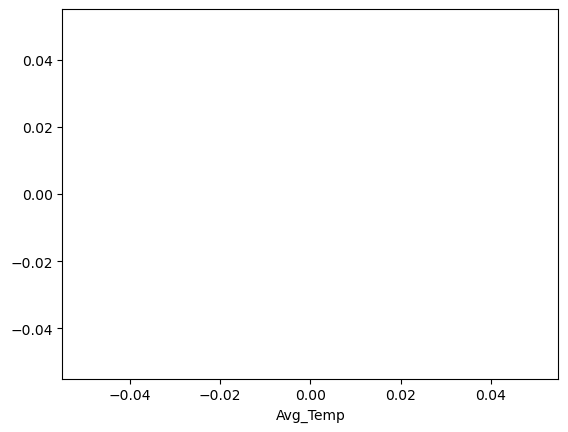

In [55]:
import seaborn as sns
sns.lineplot(test['Avg_Temp'])
sns.lineplot(test['pred_temp'])
plt.show()